<a href="https://colab.research.google.com/github/MafikengZ/Unsupervised-Learning-Recommender-Systems/blob/main/engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System
![netflix.jpg](attachment:netflix.jpg)

Recommendation engines is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.such systems have the capability to predict future preferences of items that a person would probably like to have. It works by finding similarities between two items

Broadly, recommender systems can be classified into 3 types:

- **Simple recommenders**:offer generalized recommendations to every user, based on movie popularity and/or genre. The basic ideabehind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

- **Content-based recommenders:** suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.

- **Collaborative filtering engines:** these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.


***Sources:*** 
*https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb*

*https://www.kaggle.com/najeedosmani/movie-recommender-system-with-eda*

### Benefits of using Recommender Systems

![recommendation-system.png](attachment:recommendation-system.png)

 Organisaztion utilize Recommendation engines to improve their personalised user experience and customer satisfaction and while driving the economic benefits through increased revenue.

## Commet Configurations

In [1]:
!pip3 install comet_ml

     |████████████████████████████████| 314 kB 5.3 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 547 kB 48.0 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=a9d7a72e5b0f0847a0c35dbf997b13384b38dfdc79d0306d489693a6003e5dcd
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [2]:
# import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="HfSNpkY9koDD8GCccjV6a7o3K",
    project_name="recommendation-system",
    workspace="mafikengz",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mafikengz/recommendation-system/0b8daf137dff4e5fa5104a50a818ca03



## Import Libraries

In [3]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

# sns.set(style='whitegrid', palette='muted',
#         rc={'figure.figsize': (12,8)})

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

## Load Dataset

#### Remotely upload Kaggle Dataset on Colab

In [5]:
#Linux commands & upload file into colab
!pip install kaggle -q

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18972  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11563  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5939  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           4029  
promptcloud/careerbuilder-job-listing-2020

In [6]:
#Download dataset
! kaggle competitions download -c 'edsa-movie-recommendation-wilderness'

  0% 0.00/2.26M [00:00<?, ?B/s]
100% 2.26M/2.26M [00:00<00:00, 74.4MB/s]
 33% 5.00M/15.0M [00:00<00:00, 46.9MB/s]
100% 15.0M/15.0M [00:00<00:00, 96.0MB/s]
 59% 9.00M/15.3M [00:00<00:00, 86.9MB/s]
100% 15.3M/15.3M [00:00<00:00, 97.9MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 143MB/s]
 89% 101M/113M [00:00<00:00, 108MB/s]  
100% 113M/113M [00:00<00:00, 129MB/s]
 89% 9.00M/10.1M [00:00<00:00, 37.3MB/s]
100% 10.1M/10.1M [00:00<00:00, 33.4MB/s]
  0% 0.00/17.7k [00:00<?, ?B/s]
100% 17.7k/17.7k [00:00<00:00, 5.85MB/s]
  0% 0.00/577k [00:00<?, ?B/s]
100% 577k/577k [00:00<00:00, 81.4MB/s]
100% 81.9M/81.9M [00:00<00:00, 88.0MB/s]



In [7]:
#Unzip datasets
! mkdir datasets
!unzip movies.csv.zip -d datasets
!unzip train.csv.zip -d datasets
!unzip test.csv.zip -d datasets
!unzip tags.csv.zip -d datasets
!unzip links.csv.zip -d datasets
!unzip imdb_data.csv.zip -d datasets
!unzip genome_scores.csv.zip -d datasets
!unzip sample_submission.csv.zip -d datasets


Archive:  movies.csv.zip
  inflating: datasets/movies.csv     
Archive:  train.csv.zip
  inflating: datasets/train.csv      
Archive:  test.csv.zip
  inflating: datasets/test.csv       
Archive:  tags.csv.zip
  inflating: datasets/tags.csv       
Archive:  links.csv.zip
  inflating: datasets/links.csv      
Archive:  imdb_data.csv.zip
  inflating: datasets/imdb_data.csv  
Archive:  genome_scores.csv.zip
  inflating: datasets/genome_scores.csv  
Archive:  sample_submission.csv.zip
  inflating: datasets/sample_submission.csv  


In [8]:
# import dataset
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
tags = pd.read_csv('datasets/tags.csv')
movies = pd.read_csv('datasets/movies.csv')
links = pd.read_csv('datasets/links.csv')
imdb_data = pd.read_csv('datasets/imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('datasets/genome_scores.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

In [9]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Data Preprocessing

In [ ]:
print(f'movies shape: {movies.shape} , train shape: {train.shape}')

movies shape: (62423, 3) , train shape: (10000038, 4)


In [ ]:
print(f'Unique Rating: {train.rating.unique()}')

Unique Rating: [4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]


In [10]:
#Merge movies and train tables
data = pd.merge(train , movies, on = 'movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [11]:
from datetime import datetime

# Convert timestamp to year column representing the year the rating was made on merged dataframe
data['rating_year'] = data['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
data.drop('timestamp', axis=1, inplace=True)

In [ ]:
data.iloc[0]

userId                                5163
movieId                              57669
rating                                   4
title                     In Bruges (2008)
genres         Comedy|Crime|Drama|Thriller
rating_year                           2018
Name: 0, dtype: object

In [ ]:
data.head()

,userId,movieId,rating,title,genres,rating_year
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015


In [9]:
# Find the number of times a user has rated, create a dataframe with the count by userId
train_user = pd.DataFrame(
    data['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


### Grouping Users within specific range of userId count

In [ ]:
# Grouping the users within a certain range => determine the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [ ]:
import plotly.graph_objects as go

labels = ['first_group','second_group','third_group','forth_group' , 'fith_group']
values = [group_one, group_two, group_three, group_four , group_five]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
import plotly.express as px
# Visualize the insight in the spread, we used figures to determine the spread.
trial_error = np.array([['first_group', group_one,
                         'ratings_count between 1 and 50'],
                        ['Second_group', group_two,
                         'ratings_count between 50 and 500'],
                        ['Third_group', group_three,
                         'ratings_count between 500 and 1000'],
                        ['fourth_group', group_four,
                         'ratings_count between 1000 and 1500'],
                        ['fifth_group', group_five,
                         'ratings_count greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.show()
trial_error_df

,group,userId_grouping,explanation
0,first_group,110010,ratings_count between 1 and 50
1,Second_group,50973,ratings_count between 50 and 500
2,Third_group,1338,ratings_count between 500 and 1000
3,fourth_group,159,ratings_count between 1000 and 1500
4,fifth_group,61,ratings_count greater than 1500


**Note:** Majority of the ratings have been done by relatively new users or users who have inconsistent rating behavior. Based on this information we need to further find alternative ways of obtaining similarities between users by looking into the ratings per movie

In [10]:
# Count the number of times a specific rating has been assigned.
train_rating = pd.DataFrame(
    data['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

,rating,count
0,4.0,2652977
1,3.0,1959759
2,5.0,1445230
3,3.5,1270642
4,4.5,880516
5,2.0,656821
6,2.5,505578
7,1.0,311213
8,1.5,159731
9,0.5,157571


In [ ]:
#Visualize the Distribution of Ratings
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribustion by Rating')
fig.show()

**Note:** Rating 4.0 and 3.0 have high frequency: Meaning most movies has a rating of 4.0 with a count of 2.652977M. Which clearly indicates to us that the users in the dataset will opt for giving movies a rating of 4.0

Understanding the distribution of ratings is key to finding common traits between users.

### Analysing the Dataset

In [31]:
#Create a dataframe that outlines size of datasets
dataframes = ['train', 'test', 'tags', 'imdb_data',
              'links', 'movies', 'genome_tags', 'genome_score']

length = [len(train), len(test), len(tags),
         len(imdb_data), len(links), len(movies),
         len(genome_tags), len(genome_score)]

total_length = pd.DataFrame(list(zip(dataframes, length)),
                             columns=['dataframe', 'length'])
total_length

,dataframe,length
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb_data,27278
4,links,62423
5,movies,62423
6,genome_tags,1128
7,genome_score,15584448


In [32]:
new_row = {'dataframe': 'other', 'length': 180530}
total_length = total_length.append(new_row,
                                     ignore_index=True)
total_length

,dataframe,length
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb_data,27278
4,links,62423
5,movies,62423
6,genome_tags,1128
7,genome_score,15584448
8,other,180530


In [33]:
# By refining the data frame we were able to see the distribution of the overall data.
total_length = total_length[total_length['length'] > 100000]
total_length

,dataframe,length
0,train,10000038
1,test,5000019
2,tags,1093360
7,genome_score,15584448
8,other,180530


In [ ]:
import plotly.graph_objects as go

labels = total_length['dataframe'].values
values = total_length['length'].values
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [11]:
# Obtaining total null values in each Data Frames columns
train_count = pd.DataFrame(train.isnull().sum())
test_count = pd.DataFrame(test.isnull().sum())
tags_count = pd.DataFrame(tags.isnull().sum())
movies_count = pd.DataFrame(movies.isnull().sum())
links_count = pd.DataFrame(links.isnull().sum())
imdb_count = pd.DataFrame(imdb_data.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

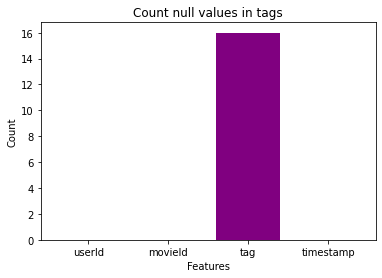

In [ ]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='purple')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in tags')
plt.show()

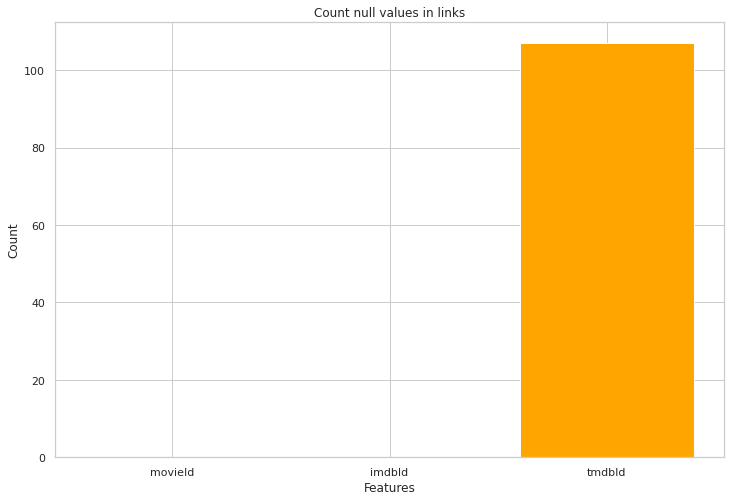

In [ ]:
plt.bar(links_count.index,
        links_count.values.reshape(len(links_count), ),
        color='orange')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in links')
plt.show()

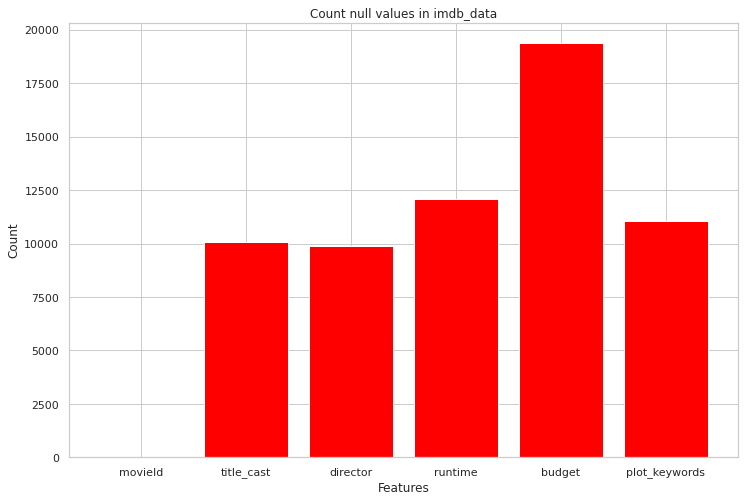

In [ ]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='red')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in imdb_data')
plt.show()

**Note:** Removing the null values produce a more refined data depending on the amount of null values present. The imdb_dataset had a large amount of null values and dropping these rows would reduce the size of the dataset.

### Visualize the Correlation in dataset

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related.

**Source:** https://en.wikipedia.org/wiki/Correlation

In [12]:
# Correlation between the train_df and tags_df
corr_tag_train = pd.concat([train, tags], axis=1).corr()
corr_tag_train.head()

,userId,movieId,rating,timestamp,userId,movieId,timestamp
userId,1.000000,-0.004270,0.002202,-0.001347,0.000358,0.001594,0.000976
movieId,-0.004270,1.000000,-0.008940,0.520786,-0.000767,0.000471,-0.000131
rating,0.002202,-0.008940,1.000000,0.010301,-0.000945,-0.000976,-0.002160
timestamp,-0.001347,0.520786,0.010301,1.000000,-0.000822,-0.000272,0.000737
userId,0.000358,-0.000767,-0.000945,-0.000822,1.000000,-0.101326,-0.197582


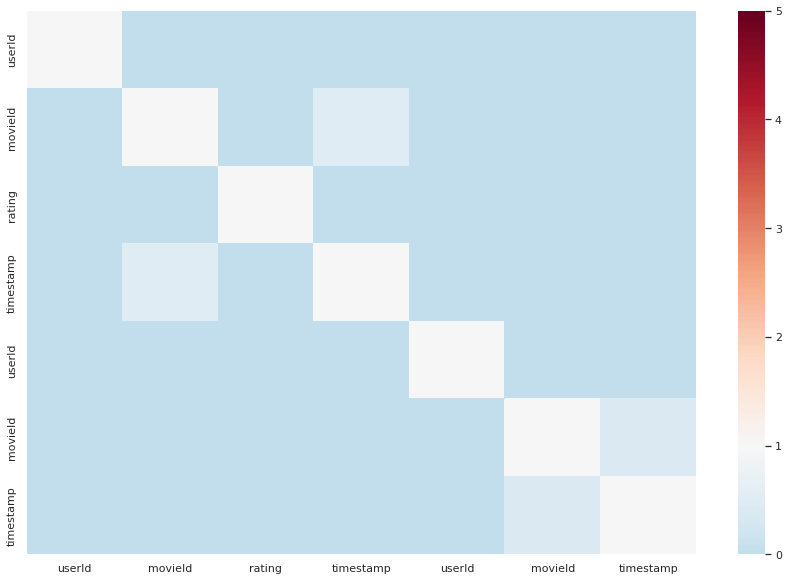

In [ ]:
sns.heatmap(corr_tag_train, vmin=0,vmax=5,center=1,cmap="RdBu_r")

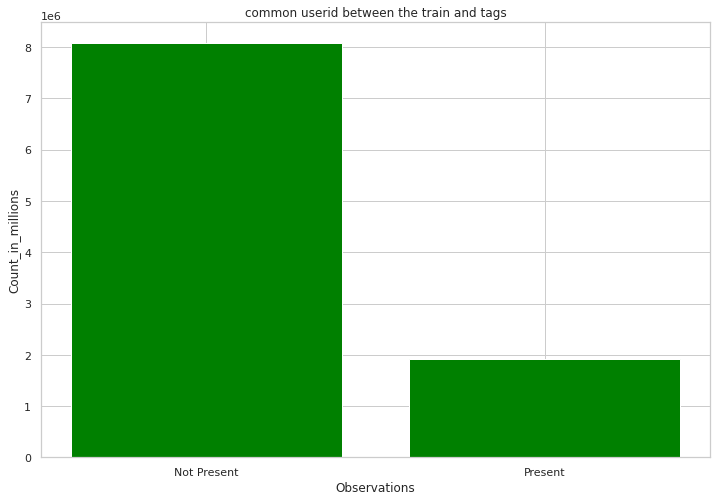

In [ ]:
# Finding values in the UserID columns of the tags and train dataframe.
common_userid = pd.DataFrame(train['userId'].isin(tags['userId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_userid.values.reshape(len(common_userid), ),
        color='green')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common userid between the train and tags')
plt.show()

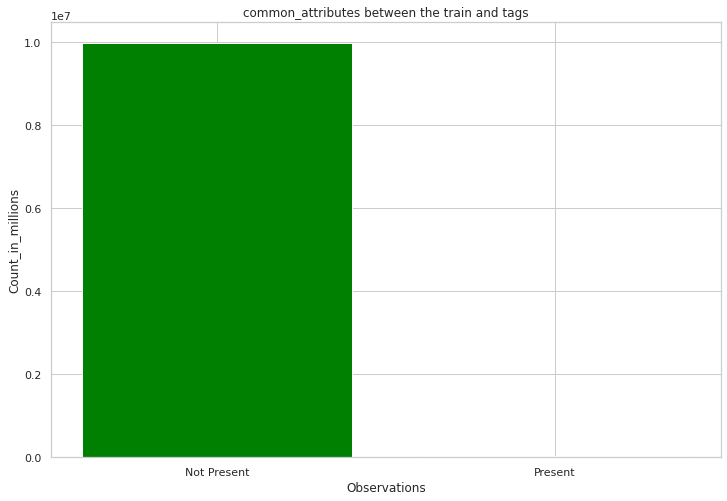

In [ ]:
# Finding values in the MovieID columns of the tags and train data frame.
common_movieid = pd.DataFrame(train['movieId'].isin(tags['movieId']).
                          value_counts())
plt.bar(['Not Present', 'Present'],
        common_movieid.values.reshape(len(common_movieid), ),
        color='green')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

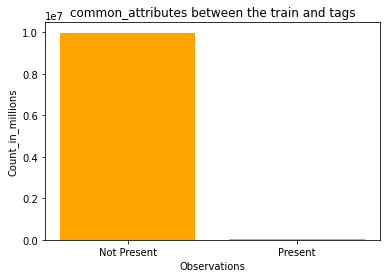

In [ ]:
# Finding values in the Timestamp columns of the tags and train.
common_timestamp = pd.DataFrame(train['timestamp'].isin(tags['timestamp']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_timestamp.values.reshape(len(common_timestamp), ),
        color='orange')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

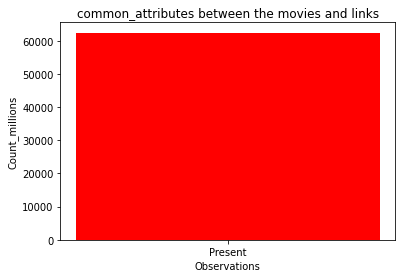

In [ ]:
# Finding values in the MovieID columns of the links and movies data frame.
common_movieid2 = pd.DataFrame(movies['movieId'].isin(links['movieId']).
                          value_counts())
plt.bar(['Present'],
        common_movieid2.values.reshape(len(common_movieid2), ),
        color='red')
plt.xlabel('Observations')
plt.ylabel('Count_millions')
plt.title('common_attributes between the movies and links')
plt.show()

Checked for common attributes between different data frames. These attributes assist us in extending our understanding of the similarities between ratings based on: Movie Genres, Directors, Movie Budgets, Movie Titles, etc.

Based on the information provided, we able to deduce the following:

- Although the train and the tags have similiar users ID's, majority of the users are new or inconsistent raters.
- The common attributes are minimal between the train and tags.
- Although there are a few users with similiar ID's, these users have no common attributes interms of the movies watched or the length of the movies.
- The table with the most common links are the movie and the links which have common attributes in the movie ID's column.

In [ ]:
#Average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().head(10)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.753731
#1 Cheerleader Camp (2010)                                 1.900000
#Female Pleasure (2018)                                    4.000000
#FollowMe (2019)                                           2.400000
#Horror (2015)                                             2.250000
#Lucky Number (2015)                                       3.000000
#Stuck (2014)                                              0.500000
#realityhigh (2017)                                        2.642857
$ (Dollars) (1971)                                         2.875000
Name: rating, dtype: float64

In [ ]:
#Highest average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().sort_values(ascending=False).head(50)

title
Final Recourse (2013)                                5.0
Lady and the Tramp (2019)                            5.0
Virasat (1997)                                       5.0
Committed (2014)                                     5.0
Sole Proprietor (2016)                               5.0
The Doll (2017)                                      5.0
Hempsters: Plant the Seed (2008)                     5.0
Nero's Guests (2009)                                 5.0
Nesting (2012)                                       5.0
The Dragon Spell (2016)                              5.0
Solanin (2010)                                       5.0
The Rizen (2017)                                     5.0
Hepta: The Last Lecture (2016)                       5.0
Her Composition (2015)                               5.0
Social Life of Small Urban Spaces (1988)             5.0
The Rival (2006)                                     5.0
The Dreamed Ones (2016)                              5.0
Land and Shade (2015)    

**Note:** There are couple of movies with the highest ratings, which are worth watching

In [ ]:
#Count Number of people actually gave ratings to a specific movie.
data.groupby(by='title')['rating'].count().sort_values(ascending=False)


title
Shawshank Redemption, The (1994)                           32831
Forrest Gump (1994)                                        32383
Pulp Fiction (1994)                                        31697
Silence of the Lambs, The (1991)                           29444
Matrix, The (1999)                                         29014
                                                           ...  
Love on the Dole (1941)                                        1
Love's Abiding Joy (2006)                                      1
Love's Brother (2004)                                          1
Love's Coming (2014)                                           1
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)        1
Name: rating, Length: 48151, dtype: int64

*Love on the Dole (1941)* has the Lowest Average rating, not even 5 viewers rated this movie, which cannot be recommended to watch!

In [13]:
#Create a table showcasing Average rating per title and the count
avg_rating_by_title = pd.DataFrame(data.groupby(by='title')['rating'].mean())
avg_rating_by_title['rating_count']= data.groupby(by='title')['rating'].count().sort_values(ascending=False) #Number of people who rated!
avg_rating_by_title.head()

,rating,rating_count
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


In [12]:
#Create a table showcasing Average rating per userId and the count
ratings_mean_count = pd.DataFrame(data.groupby('userId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
userId,,
1,3.910714,23062.0
2,3.416667,9654.0
3,3.691235,4727.0
4,3.308989,968.0
5,3.885714,4648.0


In [13]:
#Create a table showcasing Average rating per movieId and the count
ratings_mean_count = pd.DataFrame(data.groupby('movieId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head(20)

,rating,rating_counts
movieId,,
1,3.889971,23062
2,3.263414,9654
3,3.132325,4727
4,2.878099,968
5,3.059165,4648
6,3.857906,9828
7,3.381459,4838
8,3.052209,498
9,3.010533,1519


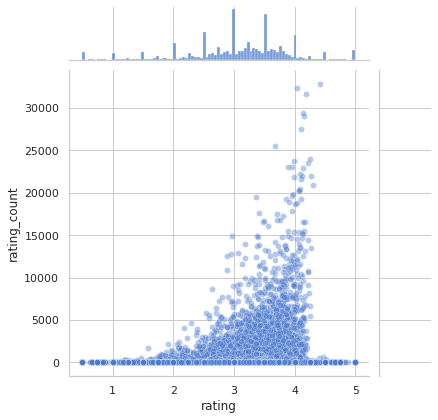

In [ ]:
#Visualize the relationships between the Average Ratings and the number of people who rated a movie.
sns.jointplot(x=avg_rating_by_title['rating'], 
              y=avg_rating_by_title['rating_count'], 
              alpha=0.4)

**Note:** Movies with ratings in the range of 3 to 4.5 has the most number of ratings. The average rating is based on the titles of the movies. For instance, Selling Isobel (2018) received an averaging of 5 stars, these averages could be misleading. Users could have rated the movies once and this could have increased the average rating. 

Shawshank Redemption, The (1994) had a total of 32831 ratings but due to the imabalance between user and ratings, the average ratings dropped. The inconsistency in the data could essentially lead to a biased model due to these observations. Grouping the ratings by the genre and finding the links between title of the movie and the average rating aided us in determining the variables which play a role in predicting the rating.

## Exploratory Data Analysis(EDA)

In [ ]:
import chart_studio.plotly as cs
import plotly.figure_factory as ff

#Visualize the Density Plot
import plotly.express as px
df = avg_rating_by_title

fig = px.density_contour(df, x="rating", y="rating_count")
fig.show()

ModuleNotFoundError: ignored

**Note:** We can see the dark black zone in the plot which represent most no. of datapoints almost have 2 to 4 star ratings. Dark regions generally represent the Dense zones, which simply means alot of datapoints at that region

Text(0, 0.5, 'Counts')

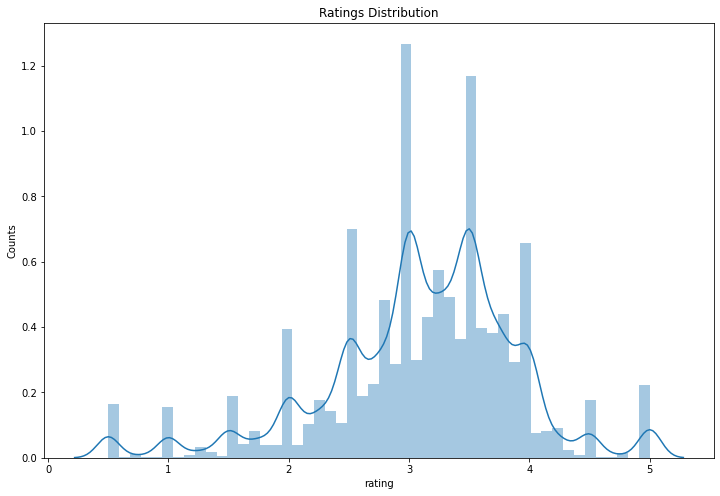

In [ ]:
#Visualize the ratings distribution
plt.figure(figsize=(12,8))
sns.distplot(avg_rating_by_title['rating'])
plt.title('Ratings Distribution')
plt.ylabel('Counts')

**Note:** The graph has Normal distribution with some negative skew.

We have enough knowledge about the trends that the data is showcasing confidence to actually create a Recommender system that suggests similar kind of movies.

Text(0.5, 1.0, 'Ratings Year Distribution')

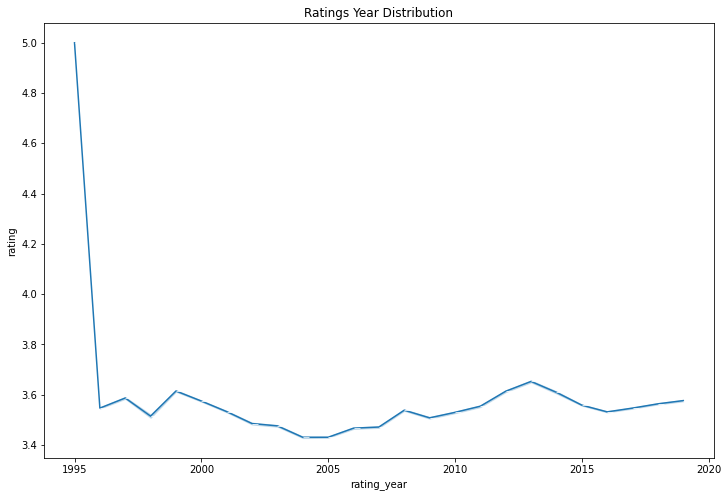

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x="rating_year", y="rating" , marker=True)
plt.title('Ratings Year Distribution')

### Generate wordCloud

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word.

**Source:** https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

words = ''

for x in tags['tag']:

    # typecaste each val to string
    x = str(x)

    # split the value
    tokens = x.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

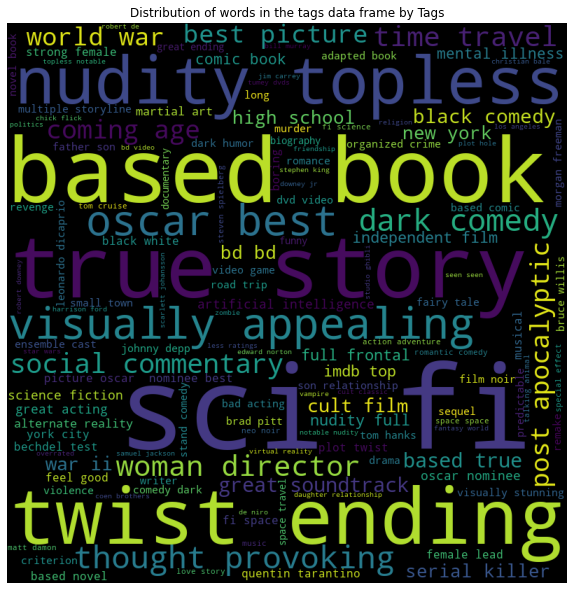

In [ ]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
value_count = pd.DataFrame(tags['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)
value_count.head()

,genre,count
0,sci-fi,8330
1,atmospheric,6516
2,action,5907
3,comedy,5702
4,surreal,5326


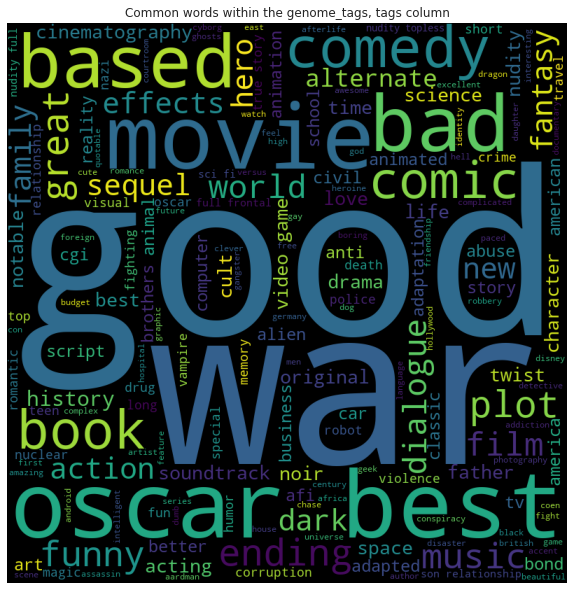

In [ ]:
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in genome_tags['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Common words within the genome_tags, tags column')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
common_users = train.groupby(by = 'userId')
common_users.get_group(1)

KeyboardInterrupt: ignored

In [ ]:
train_com_user.head()

NameError: ignored

### Analyzing the Release Year

In [14]:
dates = []
for title in data['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

data['release year'] = dates
data['release year'].unique()

array([2008, 1995, 2002, 2005, 1994, 1936, 1956, 1998, 2014, 1973, 2011,
       1997, 2000, 2006, 1999, 2016, 1993, 1989, 2013, 2003, 1981, 1984,
       2001, 1980, 2012, 2007, 1990, 1938, 2018, 2004, 1967, 1977, 1996,
       1971, 1979, 2010, 1983, 1958, 1933, 1988, 1974, 2017, 2015, 1940,
       1972, 1946, 1992, 1978, 1959, 1985, 2009, 1987, 1952, 1963, 1937,
       1954, 1991, 1969, 1964, 1944, 1968, 1982, 1975, 1986, 1976, 1960,
       1961, 1942, 1922, 1957, 1934, 1962, 1941, 1926, 1939, 1951, 1970,
       1935, 1928, 1966, 1965, 2019, 1945, 1948, 1953, 1955, 1949, 1925,
       1947, 1943, 1927, 1950, 9999, 1902, 1918, 1931, 1932, 1930, 1923,
       1929, 1921, 1917, 1920, 1919, 1916, 1924, 1897, 1900, 1915, 1907,
       1903, 1913, 1895, 1911, 1896, 1894, 1898, 1892, 1905, 1901, 1914,
       1906, 1910, 1912, 1890, 1904, 1899, 1888, 1887, 1908, 1891, 1878,
       1909,    6, 1883, 1874])

In [15]:
data[data['release year'] == 9999].head()

,userId,movieId,rating,title,genres,rating_year,release year
5971213,114323,149334,3.0,Nocturnal Animals,Drama|Thriller,2016,9999
5971214,116372,149334,3.5,Nocturnal Animals,Drama|Thriller,2017,9999
5971215,50616,149334,4.0,Nocturnal Animals,Drama|Thriller,2017,9999
5971216,107648,149334,4.0,Nocturnal Animals,Drama|Thriller,2017,9999
5971217,72771,149334,5.0,Nocturnal Animals,Drama|Thriller,2017,9999


In [ ]:
data[(data['release year'] > 1888) &
          (data['release year'] < 2021)]

,userId,movieId,rating,title,genres,rating_year,release year
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018,2008
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009,2008
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015,2008
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014,2008
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015,2008
...,...,...,...,...,...,...,...
10000032,10919,206311,0.5,Blood Machines (2019),Sci-Fi,2019,2019
10000033,84146,107912,3.0,"Fallen, The (2004)",Action|Drama|War,2014,2004
10000035,131116,206347,3.0,Nocturne (1946),Crime|Drama|Mystery,2019,1946
10000036,85757,196867,3.5,Guys & Balls (2004),Comedy|Romance,2019,2004


In [ ]:
dataset = pd.DataFrame(data['release year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'release year': 'count'},
               inplace=True)
dataset.head(50)

,year,count
0,1995,598412
1,1994,521621
2,1999,450391
3,1996,444231
4,2000,386359
5,1997,372869
6,1993,371445
7,2001,360392
8,1998,357105
9,2002,327004


Text(0.5, 1.0, 'Ratings Year Distribution')

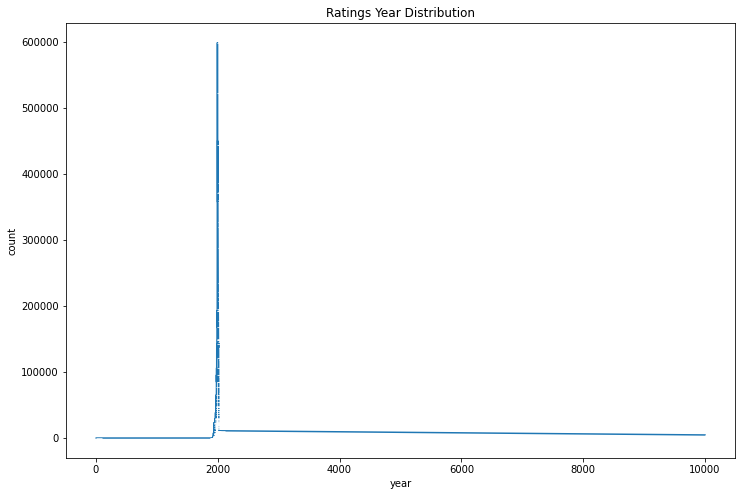

In [ ]:
# Plotting the release years
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset, x="year", y="count" , marker=True)
plt.title('Ratings Year Distribution')

### Analyzing Movie Genre

In [11]:
genres = pd.DataFrame(data['genres'].
                      str.split("|").
                      tolist(),
                      index=data['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

,movieId,Genre
0,57669,Comedy
1,57669,Crime
2,57669,Drama
3,57669,Thriller
4,57669,Comedy


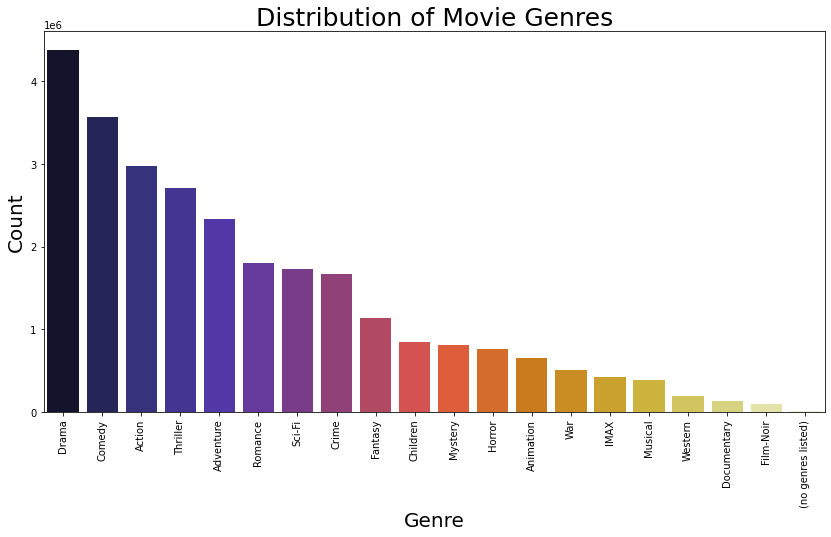

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

According to a study published by Amy Waston (Favorite film genres in the U.S. 2018, by gender) suggests that the top two genres liked by both men and women are Comedys and Dramas. From above results we can see that Drama and Comedy are the movie genre that the viewers would most likely would watch.

**Source:** https://www.statista.com/statistics/254115/favorite-movie-genres-in-the-us/

### Analysing Movie Budget

In [16]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [16]:
imdb_data['runtime'] = imdb_data['runtime'].fillna(imdb_data['runtime'].mean())
imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime              0
budget           19372
plot_keywords    11078
dtype: int64

In [ ]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [18]:
imdb_data['budget'] = imdb_data['budget'].str.replace('[\,]', '', regex=True)

In [19]:
import re
def clean_txt(text):
    text = re.sub(r'[0-9]+', "", str(text))
    return text

imdb_data['currency'] = imdb_data['budget'].apply(clean_txt)
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,currency
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,$30000000,toy|rivalry|cowboy|cgi animation,$
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,$65000000,board game|adventurer|fight|game,$
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,$25000000,boat|lake|neighbor|rivalry,$
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,$16000000,black american|husband wife relationship|betra...,$
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,$30000000,fatherhood|doberman|dog|mansion,$


In [20]:
currencies = list(imdb_data['currency'])
# Number of currencies
len(set(currencies))-1

53

In [21]:
currencies_count_df = pd.DataFrame(imdb_data['currency'].
                                   value_counts()).reset_index()
currencies_count_df.rename(columns={'index': 'currency', 'currency': 'count'},
                           inplace=True)
currencies_count_df.head()

,currency,count
0,nan,19372
1,$,6426
2,EUR,682
3,GBP,184
4,CAD,130


In [ ]:
fig = px.bar(currencies_count_df, x=currencies_count_df['currency'],
             y=currencies_count_df['count'],
             color=currencies_count_df['currency'],
             title='Currency Type Distribution')
fig.show()

More than 71% of the data in the budget column are null values. The budget column contains different currencies with the US Dollar holding the majority. The exchange rates change gradually over time, with time value of money, money loses value over time so comparing or changing to one currency will not be ideal.

# Build Recommendation Model

### Collaborative Filtering Technique

The collaborative filtering approach builds models based on user’s past behaviors as well as similar decisions made by other users. This model is used to predict items (or ratings for items) that the user may have an interest in. Within collaborative filtering, there are two well-known distinct approaches:

- Memory-Based: models calculate the similarities between users / items based on user-item rating pairs.
- Model-Based: models use some sort of machine learning algorithm to estimate the ratings.

#### Singular Value Decomposition (SVD)

**Mathematics:** In linear algebra, the Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science.

To understand SVD we need to first understand the Eigenvalue Decomposition of a matrix. We can think of a matrix A as a transformation that acts on a vector x by multiplication to produce a new vector Ax. We use [A]ij or aij to denote the element of matrix A at row i and column j. If A is an m×p matrix and B is a p×n matrix, the matrix product C=AB (which is an m×n matrix) is defined as:


In the SVD model, an estimated rating of user u on item i is calculated as:
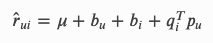

- where μ is the overall average rating, and every other parameter is calculated from the model with a gradient descent method.
- The model will then try to fit this estimated rating on all the known ratings, minimise the MSE (mean squared error), and return the closest fit.
- bᵤ and bᵢ are scalars, they represent the biases of the user u or item i.
- pᵤ and qᵢ are vectors,.they are the actual matrix-factorisation part of the model.

In [22]:
#Preparing the dataset
train_set = train.drop(['timestamp'], axis=1)
train_set = train_set.reset_index(drop=True)

print(train_set.shape)
train_set.head()

(10000038, 3)


,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [17]:
! pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623197 sha256=130de6ba37f200fb3260ce13b72e92770384eaf378bc967af760d65cbb79bfae
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [18]:
#Load Dataset
from surprise import Reader
from surprise import Dataset
reader = Reader(rating_scale=(0.0, 5.0))
df = Dataset.load_from_df(train_set[['userId', 'movieId', 'rating']], reader)
df

NameError: ignored

In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.10)

In [ ]:
from surprise import SVD
from surprise import accuracy 

In [ ]:
# Modelling => Contains default parameters
algo = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
algo.fit(trainset)

predictions = algo.test(testset)
rmse_svd = accuracy.rmse(predictions)
print('RMSE: ', rmse_svd)

RMSE: 0.8272
RMSE:  0.8271796272362566


### Cosine Similarity

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [27]:
# Create Data Frame based on the grouping of elements by userID
avg_userid = train.groupby(by="userId", as_index=False)['rating'].mean()
rating_avg = pd.merge(train, avg_userid, on='userId')
# Calcualte difference of the Mean ratings
rating_avg['avg_rating'] = rating_avg['rating_x'] - rating_avg['rating_y']
rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,avg_rating
0,5163,57669,4.0,1518349992,4.136364,-0.136364
1,5163,68157,5.0,1434310125,4.136364,0.863636
2,5163,1247,4.5,1434310106,4.136364,0.363636
3,5163,441,4.0,1518292657,4.136364,-0.136364
4,5163,2671,1.0,1545511636,4.136364,-3.136364


In [28]:
avg_movieid = pd.DataFrame(rating_avg['movieId'].
                             value_counts()).reset_index()
avg_movieid.rename(columns={'index': 'movieId', 'movieId': 'count'},
                     inplace=True)
avg_movieid

,movieId,count
0,318,32831
1,356,32383
2,296,31697
3,593,29444
4,2571,29014
...,...,...
48208,168686,1
48209,198641,1
48210,141269,1
48211,133073,1


In [29]:
# Merge Dataframes to increase information
rating_avg = pd.merge(avg_movieid, rating_avg, on='movieId')
rating_avg.head()

,movieId,count,userId,rating_x,timestamp,rating_y,avg_rating
0,318,32831,106362,4.5,1303329140,3.371012,1.128988
1,318,32831,144018,4.0,1109921309,3.486301,0.513699
2,318,32831,80119,5.0,1254575871,2.707547,2.292453
3,318,32831,6063,4.0,1126444252,3.044807,0.955193
4,318,32831,109194,5.0,1547837993,4.057377,0.942623


In [30]:
# To preserve disk memory, only include ratings above 1000 per user.
rating_avg = rating_avg[rating_avg['count'] > 1000]
rating_avg.head()

,movieId,count,userId,rating_x,timestamp,rating_y,avg_rating
0,318,32831,106362,4.5,1303329140,3.371012,1.128988
1,318,32831,144018,4.0,1109921309,3.486301,0.513699
2,318,32831,80119,5.0,1254575871,2.707547,2.292453
3,318,32831,6063,4.0,1126444252,3.044807,0.955193
4,318,32831,109194,5.0,1547837993,4.057377,0.942623


In [31]:
rating_avg.groupby('movieId')['avg_rating'].count().sort_values(ascending=False).head()

movieId
318     32831
356     32383
296     31697
593     29444
2571    29014
Name: avg_rating, dtype: int64

In [32]:
data[data['movieId']== 318]['title'].head(1)

282777    Shawshank Redemption, The (1994)
Name: title, dtype: object

**Note:** The distributrion of movie ID's by rating also contained movies with single ratings or ratings that could be seen as negligable. We decided to obtain the top 20 movie ID's and see how they are distributed. 

Based on the graphs, we noticed movie ID 318 ***(Shawshank Redemption, The (1994))*** had the most ratings and this aided in using a base movie to obtain similarities amoung users when using the cosine similarity method.

#### Model

In [33]:
rating_avg.head()

,movieId,count,userId,rating_x,timestamp,rating_y,avg_rating
0,318,32831,106362,4.5,1303329140,3.371012,1.128988
1,318,32831,144018,4.0,1109921309,3.486301,0.513699
2,318,32831,80119,5.0,1254575871,2.707547,2.292453
3,318,32831,6063,4.0,1126444252,3.044807,0.955193
4,318,32831,109194,5.0,1547837993,4.057377,0.942623


In [ ]:
pvt_table = rating_avg.pivot_table(values='rating_x', 
                           index='userId', columns='movieId')

pvt_table.head()

In [27]:
# Obtain the best rated movie.
best_ratings = pvt_table.iloc[317]
best_ratings.head()

movieId
1    3.5
2    NaN
3    NaN
5    NaN
6    3.5
Name: 318, dtype: float64

In [28]:
#correlation of movie ratings based on the best rated movie.
movies_like_318 = pvt_table.corrwith(best_ratings)
corr_shawshank = pd.DataFrame(movies_like_318,
                              columns=['correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,correlation
movieId,
1,0.018041
2,0.635085
3,0.269430
5,0.500000
6,0.615547


In [29]:
corr_shawshank.sort_values('correlation', ascending=False).head(10)

,correlation
movieId,
195159,1.0
8783,1.0
4848,1.0
5254,1.0
5620,1.0
1288,1.0
1269,1.0
5903,1.0
1237,1.0


In [30]:
data[data['movieId']== 8783]['title'].head(1)

7820964    Village, The (2004)
Name: title, dtype: object

In [31]:
corr_shawshank = corr_shawshank.join(ratings_mean_count['rating_counts'])
corr_shawshank.head()

,correlation,rating_counts
movieId,,
1,0.018041,23062
2,0.635085,9654
3,0.269430,4727
5,0.500000,4648
6,0.615547,9828


In [32]:
corr_shawshank.reset_index()

,movieId,correlation,rating_counts
0,1,0.018041,23062
1,2,0.635085,9654
2,3,0.269430,4727
3,5,0.500000,4648
4,6,0.615547,9828
...,...,...,...
1011,166461,-0.755929,1596
1012,166635,1.000000,1252
1013,168250,-1.000000,1977
1014,168252,0.500000,2688


In [33]:
trial = pd.merge(corr_shawshank, rating_avg, on='movieId')
trial.head()

,movieId,correlation,rating_counts,count,userId,rating_x,timestamp,rating_y,avg_rating
0,1,0.018041,23062,23062,106362,4.0,1304098217,3.371012,0.628988
1,1,0.018041,23062,23062,80119,4.5,1308617433,2.707547,1.792453
2,1,0.018041,23062,23062,33970,4.0,1463273225,3.699605,0.300395
3,1,0.018041,23062,23062,146347,4.0,974744286,3.115023,0.884977
4,1,0.018041,23062,23062,80854,5.0,940242372,3.774775,1.225225


In [34]:
attempt = pd.pivot_table(trial,
                         values='correlation',
                         index='userId',
                         columns='movieId')
attempt.head()

movieId,1,2,3,5,6,7,10,11,16,17,19,21,23,24,25,29,32,34,36,39,45,47,48,50,62,70,73,81,88,94,95,104,110,111,112,141,145,147,150,153,...,109374,109487,110102,111360,111659,112552,112852,114180,114935,115149,115617,115713,116797,116823,118696,119141,122882,122886,122892,122900,122904,122912,122914,122918,122920,122926,134130,134853,136020,139385,143355,148626,152081,164179,164909,166461,166635,168250,168252,195159
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.316587,NaN,NaN,NaN,NaN,NaN,NaN,0.081461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645142,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.792594,-1.0,NaN,0.917663,-0.270936,-1.0,NaN,NaN,-1.0,NaN,-0.150414,-0.956183,NaN,NaN,-0.923381,NaN,0.327327,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.511408,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271483,NaN,-0.792594,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.956183,NaN,NaN,NaN,NaN,NaN,NaN,-0.524672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.018041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.316587,NaN,NaN,NaN,NaN,0.220215,NaN,0.081461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,0.266919,-0.321898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# final_user = attempt.apply(lambda x: x.fillna(x.np.mean()), axis=1)
# final_user.head()

final_user = attempt.apply(lambda x: np.mean(x.loc[:]) , axis=1)
fina_user.head()

In [ ]:
# Fill the diagonal of the new table with Zeroes.
np.fill_diagonal(final_user.values, 0)

In [ ]:
# Find a predefined number of training samples closest in
# distance to the new point.

def find_n_neighbours(df, n):

    order = np.argsort(df.values, axis=1)[:, : n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
                  .iloc[:n].index,
                  index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
# Find a users top 3 favorite movies.
sim_user_30_u = find_n_neighbours(final_user, 3)
sim_user_30_u.head()

In [ ]:
# Get users with similiar rating styles.

def get_user_similar_movies(user1, user2):
    common_movies = rating_avg[rating_avg.userId == user1].merge(
        rating_avg[rating_avg.userId == user2],
        on="movieId",
        how="inner")
    return common_movies.merge(movies_df, on='movieId')

In [ ]:
# See if our algorithm is able to find similiar movies between two users.

a = get_user_similar_movies(370, 86309)
a = a.loc[:, ['rating_x_x', 'rating_x_y', 'title']]
a.head()

In [ ]:
# Dictionary to round numbers to the nearest userID.

def dictionary_trial(item):
    my_list = [col for col in final_user.columns]
    my_dict = {'values': my_list}
    answer = []

    for x in my_dict['values']:
        if x < item:
            answer.append(x)
        if x == item:
            answer.append(item)
    return (max(answer))

In [ ]:
# Check if we are able to round of to the nearest user.
dictionary_trial(195160)

In [ ]:
# Predict the rating based on the user and the movie chosen.

def User_item_score(user, item):
    mean = train_df.groupby(by="userId", as_index=False)['rating'].mean()
    # print(1)
    a = sim_user_30_u[sim_user_30_u.index == user].values
    # print(2)
    b = a.squeeze().tolist()
    # print(3)
    c = final_user.loc[:, dictionary_trial(item)]
    # print(4)
    # print(c)
    d = c[c.index.isin(b)]
    # print(5)
    # print(d)
    f = d[d.notnull()]
    # print(6)
    # print(f)
    avg_user = mean.loc[mean['userId'] == user, 'rating'].values[0]
    # print(7)
    # print(avg_user)
    index = f.index.values.squeeze().tolist()
    # print(8)
    # print(index)
    corr = final_user.loc[user, index]
    # print(9)
    fin = pd.concat([f, corr], axis=1)
    # print(10)
    fin.columns = ['adg_score', 'correlation']
    # print(11)
    fin['score'] = fin.apply(lambda x: x['adg_score'] * x['correlation'], axis=1)
    # print(12)
    nume = fin['score'].sum()
    # print(13)
    deno = fin['correlation'].sum()
    # print(14)
    final_score = avg_user + (nume / deno)
    # print(15)
    return final_score

# score = User_item_score(129299, 129299)

In [ ]:
# Check if we are able to predict based on similiar user ratings.
score = User_item_score(129298, 129298)
print("score (u,i) is", score)

In [ ]:
sliced_df = train_df.iloc[0: 100, :]
tester_df = sliced_df[['userId', 'movieId', 'rating']]
tester_df['pred_rating'] = [User_item_score(tester_df['userId'][i],
                                            tester_df['movieId'][i]) for i in list(tester_df.index)]

In [ ]:
tester_df['movieId'][129299]

In [ ]:
# Obtain the RMSE for the sample provided.
rmse = mean_squared_error(tester_df['rating'].values,
                          tester_df['pred_rating'].values,
                          squared=False)
print("RMSE: ", rmse)

### Content-Based Filtering (Linear Regression)

In [ ]:
# Dataframe we are working with.
working_train = tester_df #.drop(columns='timestamp')

In [ ]:
# Merge
df_work = working_train.set_index('movieId').join([movies_df
                                                [['movieId', 'genres']].
                                                set_index('movieId'),
                                                imdb_df[['movieId',
                                                'title_cast',
                                                'director',
                                                'plot_keywords']].
                                                set_index('movieId')],
                                                how='left').reset_index()

In [ ]:
def preprocessor(df):
    
    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [ ]:
Test = preprocessor(test_df)
Test

In [ ]:
X = preprocessor(train_df.drop(columns=['timestamp'])) # DO NOT RUN THIS ON LOCAL COMPUTER

In [ ]:
y = train_df['rating']

In [ ]:
X['rating'] = y

In [ ]:
X1 = X.drop(columns=['rating', 'userId', 'movieId'])
T1 = Test.drop(columns=['userId', 'movieId'])

In [ ]:
cv = CountVectorizer()
X_mat =cv.fit_transform(X1['corpus'])

In [ ]:
Test_mat = cv.transform(T1['corpus'])

In [ ]:
X_mat.shape

### Model

In [ ]:
estimators2 = []
estimators2.append(('standardize',
                    StandardScaler(with_mean=False)))
estimators2.append(('mod',
                    LinearRegression()))
model = Pipeline(estimators2)
model.fit(X_mat, y)

### Collaborative Filtering

In [ ]:
count_df = pd.DataFrame(train_df['movieId'].value_counts()).reset_index()
count_df.rename(columns = {'index':'movieId','movieId' : 'count'}, inplace = True)
count_df

In [ ]:
train_count =pd.merge(count_df, train_df ,on='movieId')
train_count.head()

In [ ]:
filter_user = train_count[train_count['count']>10000]
filter_user.head()

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [NormalPredictor(),
                  KNNBaseline(),
                  KNNBasic(),
                  KNNWithMeans(),
                  KNNWithZScore(),
                  BaselineOnly(),
                  CoClustering(),
                  SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'],
                             cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).
                                split(' ')[0].
                                split('.')[-1]],
                               index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_factors' : 300, 
               'lr_all':0.0085,
               'reg_all' : 0.02,
               'n_epochs':40,
               'init_std_dev':0.01
               }
algo = SVD(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'],
               cv=3, verbose=False)

In [ ]:
# Training and validation set split for hypertuning

train_set = data.build_full_trainset()
# train_set, val_set = train_test_split(data, test_size=0.008, random_state=42)

# Modelling of the SVD hypertuning
algo = SVD(n_factors=300, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=40,
                     init_std_dev=0.01)
algo.fit(train_set)

# Predicting on the validation set
# svd_hyper_predictions = algo.test(val_set)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
# metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}


In [ ]:
submission_df = [algo.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
df_pred = pd.DataFrame(submission_df)
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
#Change positioning of columns
df_pred = df_pred[['Id', 'rating']]
# Create Submission file
df_pred.to_csv("engine.csv", index=False)
df_pred

In [ ]:
df_pred.to_csv("engine.csv", index=False)

In [ ]:
# # Compare RMSE squared values between models
# fig, caxis = plt.subplots(figsize=(12, 6))
# rmse_x = ['Linear Regression',
#           'BaselineOnly', 'SVD',
#           'Cosine Similarity',
#           'Baseline Only',
#           'KNN Baseline',
#           'KNN With Means',
#           'KNN WIth Z Score',
#           'KNN Basic',
#           'CoClustering',
#           'Normal Predictor']
# rmse_y = [lr_rmse, baseline_rmse, rmse_svd, CF_cosine, baselineOnly,
#           kNNBaseline, kNNWithMeans, kNNWithZScore, kNNBasic,
#           coClustering, normal]
# ax = sns.barplot(x=rmse_x, y=rmse_y, palette='plasma_r')
# plt.title('RMSE Values of Models', fontsize=14)
# plt.ylabel('RMSE')
# plt.xticks(rotation=90)
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(),
#             round(p.get_height(), 2),
#             fontsize=12, ha="center",
#             va='bottom')
# plt.show()

In [ ]:
svd_params = dict(n_factors=100, n_epochs=20,
                  lr_all=0.005, reg_all=0.02)

lr_params = dict(fit_intercept=True, normalize=False,
                 copy_X=True, n_jobs=None)

baselineOnly_params = dict(verbose =True)

knnbaseline_params = dict(k=40, min_k=1, sim_options={},
                          bsl_options={}, verbose=True) 

knnwithmeans_params = dict(k=40, min_k=1,
                           sim_options={}, verbose=True)

knnwithzscore_params = dict(k=40, min_k=1,
                            sim_options={}, verbose=True)
                            
knnbasic_params = dict(k=40, min_k=1,
                       sim_options={}, verbose=True)

In [ ]:
params = {'model type': 'SVD',
          'scaler': 'standard scaler',
          'params': str(svd_params),
          'model type': 'Linear Regression',
          'params': str(lr_params),
          'model type': 'Baseline Only',
          'params': str(baselineOnly_params),
          'model type': 'KNNBaseline',
          'params': str(knnbaseline_params),
          'model type': 'KNNWithMeans',
          'params': str(knnwithmeans_params),
          'model type': 'KNNWithZScore',
          'params': str(knnwithzscore_params),
          'model type': 'KNNBasic',
          'params': str(knnbasic_params),
          'stratify': True
          }

In [ ]:
# metrics = {'RMSE_SVD': rmse_svd,
#            'RMSE_LR': lr_rmse,
#            'RMSE_BaselineOnly': baseline_rmse,
#            'RMSE_Cosine': CF_cosine,
#            'KNNBaesline': kNNBaseline,
#            'KNNWithMeans': kNNWithMeans,
#            'KNNWithZScore': kNNWithZScore,
#            'KNNBasic': kNNBasic,
#            'CoClustering': coClustering,
#            'Normal': normal
#            }

In [ ]:
experiment.log_dataset_hash(data)
experiment.log_parameters(params)
experiment.log_metrics(metrics)

#End comet_ml Experiment
experiment.end()

### Conclussion

We were able to solve the problem statement and managed to build a model that estimates the ratings of the movie as well as make movies recommendations for the streamlit app. Based on the RMSE metric calculated for all models, we decided that the SVD is the best and would be our final model. It was definitely interesting to see that the collaborative model outperformed the content-based model because of the cold-start problem. The cold-start problem, which describes the difficulty of making recommendations when the users or the items are new, remains a great challenge for collaborative filtering. We ultimately chose the SVD model based on the RMSE metric.

## Reference
- https://en.wikipedia.org/wiki/Recommender_system
- https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb